In [137]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

GRT_QUERY_ENDPOINT = "https://api.thegraph.com/subgraphs/name/convex-community/volume-mainnet-test"
GRT_QUERY_ENDPOINT = "https://api.thegraph.com/subgraphs/id/QmQq4a8b5HDWZEEjKonAz9qaFwdgugMEu5tfZ9gTqRsW3m"

def grt_query(query):
    r = requests.post(GRT_QUERY_ENDPOINT, json={'query': query})
    return r.json()['data']

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [138]:
fee_query = """
{ pools(first: 1000) {
  isV2
  id
  name
  dailyPoolSnapshots(first: 1000 orderBy: timestamp orderDirection: desc) {
    timestamp
    adminFeesUSD
    lpFeesUSD
    totalDailyFeesUSD
    eventFeesUSD
    baseApr
    tvl
  }
}
}
"""

In [139]:
data = grt_query(fee_query)['pools']
df = pd.DataFrame([{k: v for k, v in dict({key: val for key, val in entry.items() if key in ['id', 'isV2', 'name']}, **snapshot).items()} for entry in data for snapshot in entry['dailyPoolSnapshots']])
df['totalDailyFeesUSD'] = df['totalDailyFeesUSD'].astype(float)
df['eventFeesUSD'] = df['eventFeesUSD'].astype(float) * 2
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df = df.sort_values('timestamp', ascending=True)
df

,isV2,id,name,timestamp,adminFeesUSD,lpFeesUSD,totalDailyFeesUSD,eventFeesUSD,baseApr,tvl
28234,False,0x79a8c46dea5ada233abaffd40f3a0a2b1e5a4f27,Curve.fi yDAI/yUSDC/yUSDT/yBUSD,2020-10-30,0,0,0.0000,0.0000,0,156668694.0585704551998110539672332
29238,False,0x7fc77b5c7614e1533320ea6ddc2eb61fa00a9714,Curve.fi renBTC/wBTC/sBTC,2020-10-30,0,0,0.0000,0.0000,0,63545950.32044241703640482586072211
13304,False,0x3e01dd8a5e1fb3481f0f589056b428fc308af0fb,Curve.fi USDK/3Crv,2020-10-30,0,0,0.0000,0.0000,0,258124.3979277809995780190329914143
56448,False,0xe7a24ef0c5e95ffb0f6684b813a78f2a3ad7d171,Curve.fi LinkUSD/3Crv,2020-10-30,0,0,0.0000,0.0000,0,324714.5089474895485385295627355576
40476,False,0xa5407eae9ba41422680e2e00537571bcc53efbfd,Curve.fi DAI/USDC/USDT/sUSD,2020-10-30,0,0,0.0000,0.0000,0,49544997.78513263931160861
...,...,...,...,...,...,...,...,...,...,...
44811,False,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,Curve.fi DAI/USDC/USDT,2022-03-15,21600.87831992541644779151268184623,21600.87831992541644779151268184623,43201.7566,0.0000,0.000005537900061997876862220393997335436,3936147146.911468459119842597143804
5479,False,0x152d13e62952a7c74c536bb3c8b7bd91853f076a,Curve.fi Factory USD Metapool: FEI,2022-03-15,0,0,0.0000,0.0000,0,0
31153,False,0x8474ddbe98f5aa3179b3b3f5942d724afcdec9f6,Curve.fi MUSD/3Crv,2022-03-15,193.5265176354170519973649782743052,193.5265176354170519973649782743052,387.0530,0.0000,0.000002797477814606871744009373207710299,69180750.17986927635711159907487533
8840,False,0x273afbf6e257aae160749a61d4b83e06a841c3eb,Curve.fi Factory USD Metapool: RC_MASK_700_DAI...,2022-03-15,0.000047456309474325998022722701532314,0.000047456309474325998022722701532314,0.0001,0.0000,0.000002157865520613647150912751718407798,21.99229300156181719790375959970541


In [140]:
pd.set_option('display.max_rows', 500)
df['baseApr'] = df['baseApr'].astype(float)
df['tvl'] = df['tvl'].astype(float)
df['totalDailyFeesUSD'] = df['totalDailyFeesUSD'].astype(float)
df.sort_values('baseApr', ascending=False).head(100)

,isV2,id,name,timestamp,adminFeesUSD,lpFeesUSD,totalDailyFeesUSD,eventFeesUSD,baseApr,tvl
62929,False,0xf9ef8a8de38cea3196a4e009ad7a7af6f5a3d776,Curve.fi Factory USD Metapool: RC_xRULER_150_D...,2021-06-10,0.001640972355075513956800877169929721,0.001640972355075513956800877169929721,0.0033,0.0000,3485.1471,104.0314
64282,False,0xfe97d8f55884186e50aedba306ad553911a26a24,Curve.fi Factory USD Metapool: RC_xCOVER_90_DA...,2021-08-04,0.00000002457583575686958822021646511402743,0.00000002457583575686958822021646511402743,0.0000,0.0000,297.7013,0.0023
54638,False,0xe0b99f540b3cd69f88b4666c8f39877c79072851,Curve.fi Factory USD Metapool: MountainVUSD,2021-03-27,0.00002280244017115077133314178804630131,0.00002280244017115077133314178804630131,0.0000,0.0000,83.9994,2.1450
47212,False,0xc3134ccb0810418dcc2540c7df6e4995a9966d4e,Curve.fi Factory USD Metapool: RC_vETH2_1300_D...,2021-07-01,1.986685671367739848402924427295508,1.986685671367739848402924427295508,3.9734,0.0000,3.0265,23.2221
14752,False,0x421cb018b91b4048faac1760cee3b66026b940f2,Curve.fi Factory USD Metapool: RC_xCOVER_150_D...,2021-08-04,0.00005886477546106976700004691609356635,0.00005886477546106976700004691609356635,0.0001,0.0000,0.7733,5.6356
8186,False,0x20955cb69ae1515962177d164dfc9522feef567e,Curve.fi Factory USD Metapool: Ubiquity Algori...,2021-06-17,0.02605097910129487796839454045938727,0.02605097910129487796839454045938727,0.0521,0.0000,0.3400,108498.8483
44681,False,0xbe735e6dd6c47d86bf8510d3c36cba1a359b8ddc,Curve.fi Factory USD Metapool: RC_DEFI5_60_DAI...,2021-08-12,0.00008333704936237283436171966583855339,0.00008333704936237283436171966583855341,0.0002,0.0000,0.3205,4.1615
15510,False,0x439bfae666826a7cb73663e366c12f03d0a13b49,Curve.fi Factory USD Metapool: RC_ALCX_300_DAI...,2021-07-12,0.01383120772549095371484184449466437,0.01383120772549095371484184449466437,0.0277,0.0000,0.1920,5972.8773
48447,False,0xc8a7c1c4b748970f57ca59326bcd49f5c9dc43e3,Curve.fi Factory Plain Pool: OPEN MATIC,2022-01-11,0,0,0.0000,0.0000,0.0702,9.9217
13124,False,0x3e01dd8a5e1fb3481f0f589056b428fc308af0fb,Curve.fi USDK/3Crv,2021-04-28,13.76175889454290613653125397314402,13.76175889454290613653125397314402,27.5235,0.0000,0.0307,1596390.8576


In [141]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'][['timestamp', 'baseApr']]

,timestamp,baseApr
49492,2021-07-17,0.0000
49491,2021-07-18,0.0000
49490,2021-07-19,0.0001
49489,2021-07-20,0.0000
49488,2021-07-21,0.0001
49487,2021-07-22,0.0002
49486,2021-07-23,0.0001
49485,2021-07-24,0.0000
49484,2021-07-25,0.0000
49483,2021-07-26,0.0000


<AxesSubplot:xlabel='timestamp'>

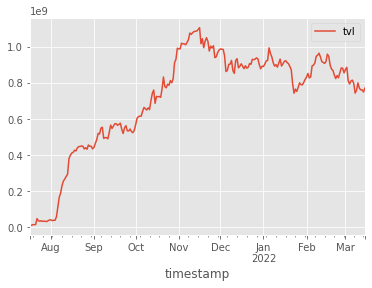

In [142]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'].plot(x='timestamp', y='tvl')

<AxesSubplot:xlabel='timestamp'>

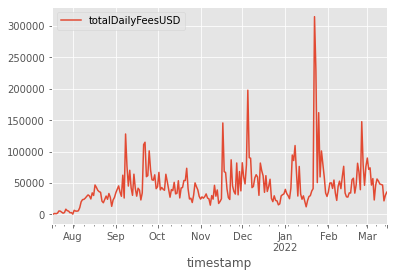

In [143]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'].plot(x='timestamp', y='totalDailyFeesUSD')

<AxesSubplot:xlabel='timestamp'>

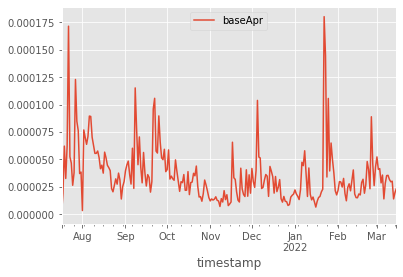

In [144]:
df[df['id'] == '0xd51a44d3fae010294c616388b506acda1bfaae46'].plot(x='timestamp', y='baseApr')

<AxesSubplot:xlabel='timestamp'>

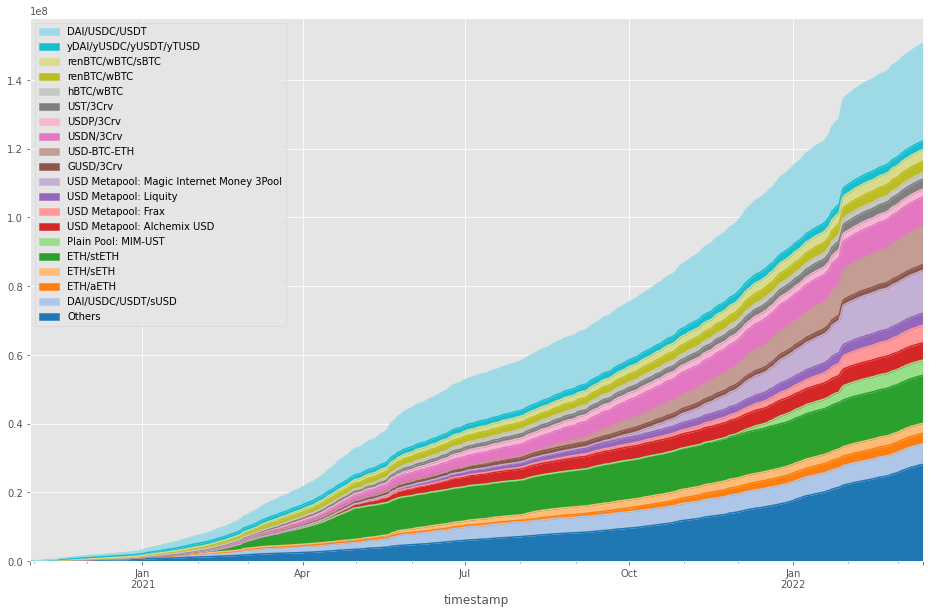

In [145]:
df['cumulativeDailyFeesUSD'] = (df['totalDailyFeesUSD']).groupby(df['id']).cumsum()
chart_data = df[['name', 'timestamp', 'cumulativeDailyFeesUSD']].pivot_table('cumulativeDailyFeesUSD', ['timestamp'], 'name', aggfunc='sum')
top_performers = chart_data.mean().sort_values(ascending=False)[:19].index.tolist()
df_others = df.copy()
df_others['name'] = df_others['name'].apply(lambda x: x if x in top_performers else 'Others')
df['cumulativeDailyFeesUSD'] = (df['totalDailyFeesUSD']).groupby(df['id']).cumsum()
chart_data_others = df_others[['name', 'timestamp', 'cumulativeDailyFeesUSD']].pivot_table('cumulativeDailyFeesUSD', ['timestamp'], 'name', aggfunc='sum')
chart_data_others['Others'] = df_others[df_others['name'] == 'Others'][['timestamp', 'cumulativeDailyFeesUSD']].groupby('timestamp').sum()['cumulativeDailyFeesUSD']
chart_data_others.columns = [s.replace('Curve.fi Factory ', '').replace('Curve.fi ', '').replace('Curve ', '') for s in chart_data_others.columns]
cols = chart_data_others.columns.tolist()
chart_data_others[([cols[-1], *cols[1:-1], cols[0]])].plot.area(figsize=(16, 10), legend='reverse', colormap="tab20")

In [146]:
WEEK = 3600 * 24 * 7
df_week = pd.DataFrame([{k: v for k, v in dict({key: val for key, val in entry.items() if key in ['id', 'isV2', 'name']}, **snapshot).items()} for entry in data for snapshot in entry['dailyPoolSnapshots']])
df_week['totalDailyFeesUSD'] = df_week['totalDailyFeesUSD'].astype(float)
df_week['timestamp'] = df_week['timestamp'].apply(lambda x: ((int(x) // WEEK) * WEEK))
df_week['timestamp'] = pd.to_datetime(df_week['timestamp'],unit='s')
df_week = df_week.sort_values('timestamp', ascending=True)
df_week[['totalDailyFeesUSD', 'timestamp', 'name', 'id']].groupby(['timestamp']).sum()

,totalDailyFeesUSD
timestamp,
2020-10-29,139380.2495
2020-11-05,295287.0187
2020-11-12,478040.1544
2020-11-19,366542.0986
2020-11-26,354029.4256
2020-12-03,274377.8630
2020-12-10,266009.9119
2020-12-17,383495.8783
2020-12-24,432562.8640


In [147]:
df_week[['totalDailyFeesUSD', 'timestamp', 'name', 'id']].groupby(['timestamp']).sum().sum() / 2

totalDailyFeesUSD   75314363.3380
dtype: float64